<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya 2348556

In [91]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
import missingno as mn
from sklearn import linear_model, metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/TelCo Cust Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [51]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [52]:
df.shape

(7043, 21)

In [53]:
df = df[df['TotalCharges'].isna() == False]

In [54]:
df.shape

(7032, 21)

In [55]:
df.drop(['customerID'], axis=1, inplace=True)

##Encoding

In [58]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
# df.drop(['gender'], axis=1, inplace=True)
df['Partner'] = le.fit_transform(df['Partner'])
# df.drop(['Partner'], axis=1, inplace=True)
df['Dependents'] = le.fit_transform(df['Dependents'])
# df.drop(['Dependents'], axis=1, inplace=True)
df['PhoneService'] = le.fit_transform(df['PhoneService'])
# df.drop(['PhoneService'], axis=1, inplace=True)
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
# df.drop(['MultipleLines'], axis=1, inplace=True)
df['InternetService'] = le.fit_transform(df['InternetService'])
# df.drop(['InternetService'], axis=1, inplace=True)
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
# df.drop(['OnlineSecurity'], axis=1, inplace=True)
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
# df.drop(['OnlineBackup'], axis=1, inplace=True)
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
# df.drop(['DeviceProtection'], axis=1, inplace=True)
df['TechSupport'] = le.fit_transform(df['TechSupport'])
# df.drop(['TechSupport'], axis=1, inplace=True)
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
# df.drop(['StreamingTV'], axis=1, inplace=True)
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
# df.drop(['StreamingMovies'], axis=1, inplace=True)
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
# df.drop(['PaperlessBilling'], axis=1, inplace=True)
df['Churn'] = le.fit_transform(df['Churn'])
# df.drop(['Churn'], axis=1, inplace=True)

In [66]:
df = pd.get_dummies(df, columns=['PaymentMethod', 'Contract'], drop_first=True)

##Split into Training and Testing sets

In [68]:
x = df.loc[:, df.columns!='Churn']
y = df.loc[:, df.columns=='Churn']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [70]:
lgr = linear_model.LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [81]:
accuracy = lgr.score(x_test, y_test)
print('accuracy is {:.2f}%'.format(accuracy*100))

accuracy is 80.88%


In [83]:
predictions = lgr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[935,  96],
       [173, 203]])

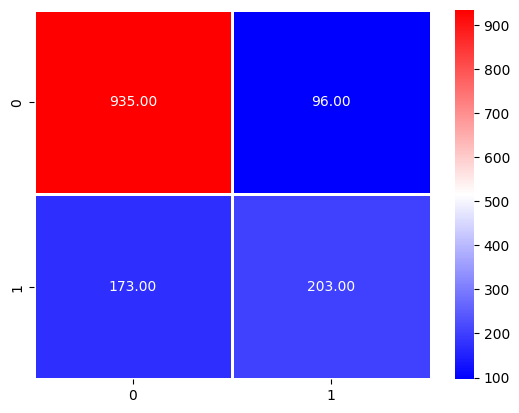

In [87]:
sb.heatmap(cm, annot=True, fmt=".2f", linewidths=1, cmap = 'bwr');

In [90]:
precision_score(y_test, predictions, average=None)

array([0.84386282, 0.67892977])

In [92]:
recall_score(y_test, predictions, average=None)

array([0.90688652, 0.53989362])